In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import scipy
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22})

sns.set_palette('husl')
sns.set_style('whitegrid')
sns.set_context('talk')

In [3]:
train = pd.read_csv('../Thinkful-Unit-2/home-credit-default-risk/application_train.csv')
test=pd.read_csv('../Thinkful-Unit-2/home-credit-default-risk/application_test.csv')

In [4]:
train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [5]:
#change column titles to all lowercase
train.columns = [x.lower() for x in train.columns]
test.columns = [x.lower() for x in test.columns]
train.columns.values

array(['sk_id_curr', 'target', 'name_contract_type', 'code_gender',
       'flag_own_car', 'flag_own_realty', 'cnt_children',
       'amt_income_total', 'amt_credit', 'amt_annuity', 'amt_goods_price',
       'name_type_suite', 'name_income_type', 'name_education_type',
       'name_family_status', 'name_housing_type',
       'region_population_relative', 'days_birth', 'days_employed',
       'days_registration', 'days_id_publish', 'own_car_age',
       'flag_mobil', 'flag_emp_phone', 'flag_work_phone',
       'flag_cont_mobile', 'flag_phone', 'flag_email', 'occupation_type',
       'cnt_fam_members', 'region_rating_client',
       'region_rating_client_w_city', 'weekday_appr_process_start',
       'hour_appr_process_start', 'reg_region_not_live_region',
       'reg_region_not_work_region', 'live_region_not_work_region',
       'reg_city_not_live_city', 'reg_city_not_work_city',
       'live_city_not_work_city', 'organization_type', 'ext_source_1',
       'ext_source_2', 'ext_source_3',

In [6]:
print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)
train.head()

Training data shape:  (307511, 122)
Test data shape:  (48744, 121)


sk_id_curr  target name_contract_type code_gender flag_own_car  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  flag_own_realty  cnt_children  amt_income_total  amt_credit  amt_annuity  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...              flag_document_18 flag_document_19  \
0             ...                             0                0   
1             ...                             0                0   
2             ...                             0                0   
3             ...                             0                0   
4             ...                             0                0   

  flag_document_20 flag_document_21 amt_req_credit_bureau_hour  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        NaN   
4                0                0                        0.0   

  amt_req_credit_bureau_day  amt_req_credit_bureau_week  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       NaN                         NaN   
4                       0.0                         0.0   

   amt_req_credit_bureau_mon  amt_req_credit_bureau_qrt  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   amt_req_credit_bureau_year  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 122 columns]

In [7]:
# from https://github.com/WillKoehrsen/machine-learning-project-walkthrough/blob/master/Machine%20Learning%20Project%20Part%201.ipynb# from  
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(test).head(10)

Your selected dataframe has 121 columns.
There are 64 columns that have missing values.


Missing Values  % of Total Values
commonarea_mode                    33495               68.7
commonarea_medi                    33495               68.7
commonarea_avg                     33495               68.7
nonlivingapartments_medi           33347               68.4
nonlivingapartments_avg            33347               68.4
nonlivingapartments_mode           33347               68.4
fondkapremont_mode                 32797               67.3
livingapartments_mode              32780               67.2
livingapartments_medi              32780               67.2
livingapartments_avg               32780               67.2

In [8]:
df = train.copy()

# taking a sample of training set for faster manipulations
#df = df.sample(frac=0.5)

target = df.target

In [9]:
# find correlations to target
corr_matrix = df.corr().abs()

print(corr_matrix['target'].sort_values(ascending=False).head(20))

target                         1.000000
ext_source_3                   0.178919
ext_source_2                   0.160472
ext_source_1                   0.155317
days_birth                     0.078239
region_rating_client_w_city    0.060893
region_rating_client           0.058899
days_last_phone_change         0.055218
days_id_publish                0.051457
reg_city_not_work_city         0.050994
flag_emp_phone                 0.045982
days_employed                  0.044932
reg_city_not_live_city         0.044395
flag_document_3                0.044346
floorsmax_avg                  0.044003
floorsmax_medi                 0.043768
floorsmax_mode                 0.043226
days_registration              0.041975
amt_goods_price                0.039645
own_car_age                    0.037612
Name: target, dtype: float64


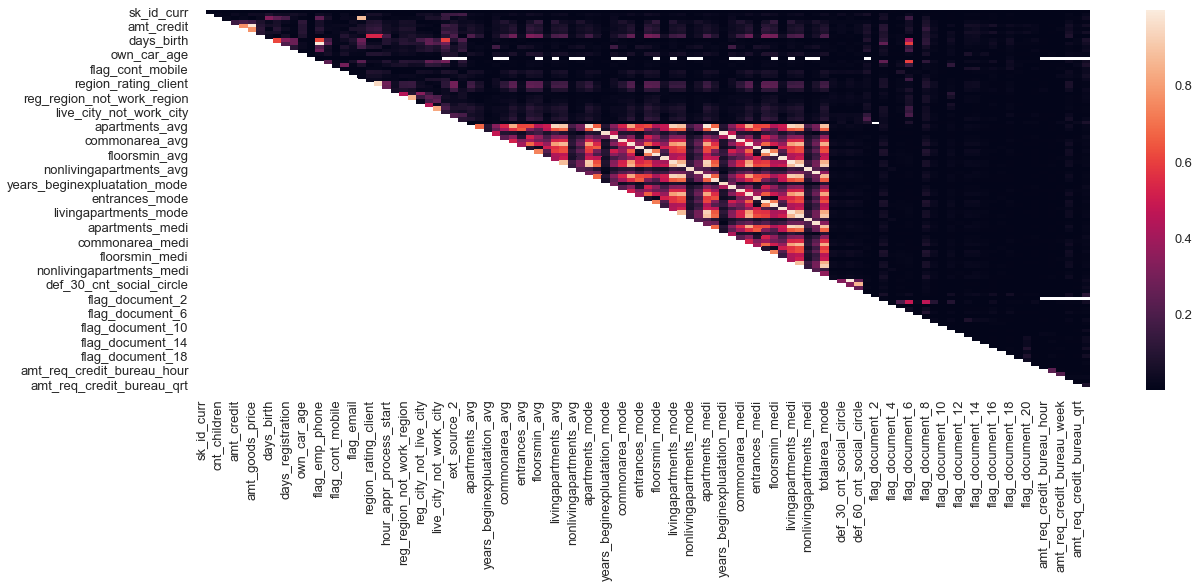

In [10]:
# Select upper triangle of correlation matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
sns.heatmap(upper)
plt.show;

In [11]:
# Match the columns in the dataframes
df, test = train.align(test, join = 'inner', axis = 1)

In [12]:
#dropping highly correlated features
#code from: https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
print('Columns to drop: ' , (len(to_drop)))

# Drop features 
df = df.drop(columns=to_drop)
print('train_features_df shape: ', df.shape)

Columns to drop:  35
train_features_df shape:  (307511, 86)


In [13]:
# checking missing values again

missing_values_table(df)

Your selected dataframe has 86 columns.
There are 34 columns that have missing values.


Missing Values  % of Total Values
commonarea_avg                       214865               69.9
nonlivingapartments_avg              213514               69.4
fondkapremont_mode                   210295               68.4
floorsmin_avg                        208642               67.8
years_build_avg                      204488               66.5
own_car_age                          202929               66.0
landarea_avg                         182590               59.4
basementarea_avg                     179943               58.5
ext_source_1                         173378               56.4
nonlivingarea_avg                    169682               55.2
elevators_avg                        163891               53.3
wallsmaterial_mode                   156341               50.8
apartments_avg                       156061               50.7
entrances_avg                        154828               50.3
housetype_mode                       154297               50.2
floorsmax_avg                        153020               49.8
years_beginexpluatation_avg          150007               48.8
emergencystate_mode                  145755               47.4
occupation_type                       96391               31.3
ext_source_3                          60965               19.8
amt_req_credit_bureau_qrt             41519               13.5
amt_req_credit_bureau_week            41519               13.5
amt_req_credit_bureau_hour            41519               13.5
amt_req_credit_bureau_mon             41519               13.5
amt_req_credit_bureau_day             41519               13.5
amt_req_credit_bureau_year            41519               13.5
name_type_suite                        1292                0.4
def_60_cnt_social_circle               1021                0.3
def_30_cnt_social_circle               1021                0.3
obs_30_cnt_social_circle               1021                0.3
ext_source_2                            660                0.2
amt_annuity                              12                0.0
cnt_fam_members                           2                0.0
days_last_phone_change                    1                0.0

In [14]:
def drop_missing_values(df, percent_drop):
    
    to_drop = [column for column in df if (df[column].isnull().sum()/len(df) >= percent_drop)]

    print('Columns to drop: ' , (len(to_drop)))
    # Drop features 
    df = df.drop(columns=to_drop)
    print('Shape: ', df.shape)
    return df

In [15]:
#dropping columns where >60% of values missing
df = drop_missing_values(df, .6)

Columns to drop:  6
Shape:  (307511, 80)


In [16]:
missing_values_table(df)

Your selected dataframe has 80 columns.
There are 28 columns that have missing values.


Missing Values  % of Total Values
landarea_avg                         182590               59.4
basementarea_avg                     179943               58.5
ext_source_1                         173378               56.4
nonlivingarea_avg                    169682               55.2
elevators_avg                        163891               53.3
wallsmaterial_mode                   156341               50.8
apartments_avg                       156061               50.7
entrances_avg                        154828               50.3
housetype_mode                       154297               50.2
floorsmax_avg                        153020               49.8
years_beginexpluatation_avg          150007               48.8
emergencystate_mode                  145755               47.4
occupation_type                       96391               31.3
ext_source_3                          60965               19.8
amt_req_credit_bureau_hour            41519               13.5
amt_req_credit_bureau_mon             41519               13.5
amt_req_credit_bureau_week            41519               13.5
amt_req_credit_bureau_qrt             41519               13.5
amt_req_credit_bureau_day             41519               13.5
amt_req_credit_bureau_year            41519               13.5
name_type_suite                        1292                0.4
def_60_cnt_social_circle               1021                0.3
def_30_cnt_social_circle               1021                0.3
obs_30_cnt_social_circle               1021                0.3
ext_source_2                            660                0.2
amt_annuity                              12                0.0
cnt_fam_members                           2                0.0
days_last_phone_change                    1                0.0

In [17]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

name_contract_type             2
code_gender                    3
flag_own_car                   2
flag_own_realty                2
name_type_suite                7
name_income_type               8
name_education_type            5
name_family_status             6
name_housing_type              6
occupation_type               18
weekday_appr_process_start     7
organization_type             58
housetype_mode                 3
wallsmaterial_mode             7
emergencystate_mode            2
dtype: int64

In [18]:
df.code_gender.value_counts()

F      202448
M      105059
XNA         4
Name: code_gender, dtype: int64

In [19]:
# getting rid of XNA values and label encode male/female
df['code_gender'] = df['code_gender'].replace(['M', 'F', 'XNA'], [1, 0, 1])
test['code_gender'] = test['code_gender'].replace(['M', 'F', 'XNA'], [1, 0, 1])

df['code_gender'].astype(int)
test['code_gender'].astype(int)

df.head()

sk_id_curr name_contract_type  code_gender flag_own_car flag_own_realty  \
0      100002         Cash loans            1            N               Y   
1      100003         Cash loans            0            N               N   
2      100004    Revolving loans            1            Y               Y   
3      100006         Cash loans            0            N               Y   
4      100007         Cash loans            1            N               Y   

   cnt_children  amt_income_total  amt_credit  amt_annuity name_type_suite  \
0             0          202500.0    406597.5      24700.5   Unaccompanied   
1             0          270000.0   1293502.5      35698.5          Family   
2             0           67500.0    135000.0       6750.0   Unaccompanied   
3             0          135000.0    312682.5      29686.5   Unaccompanied   
4             0          121500.0    513000.0      21865.5   Unaccompanied   

              ...             flag_document_18 flag_document_19  \
0             ...                            0                0   
1             ...                            0                0   
2             ...                            0                0   
3             ...                            0                0   
4             ...                            0                0   

  flag_document_20 flag_document_21  amt_req_credit_bureau_hour  \
0                0                0                         0.0   
1                0                0                         0.0   
2                0                0                         0.0   
3                0                0                         NaN   
4                0                0                         0.0   

   amt_req_credit_bureau_day  amt_req_credit_bureau_week  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        NaN                         NaN   
4                        0.0                         0.0   

   amt_req_credit_bureau_mon  amt_req_credit_bureau_qrt  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   amt_req_credit_bureau_year  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 80 columns]

In [20]:
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df[col].unique())) <= 2:
            # Train on the training data
            le.fit(df[col])
            # Transform both training and testing data
            df[col] = le.transform(df[col])
            test[col] = le.transform(test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [21]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

name_type_suite                7
name_income_type               8
name_education_type            5
name_family_status             6
name_housing_type              6
occupation_type               18
weekday_appr_process_start     7
organization_type             58
housetype_mode                 3
wallsmaterial_mode             7
emergencystate_mode            2
dtype: int64

In [22]:
print(df.emergencystate_mode.value_counts())
print(df.emergencystate_mode.isnull().sum())

No     159428
Yes      2328
Name: emergencystate_mode, dtype: int64
145755


In [23]:
# label encode emergencystate_mode column

df['emergencystate_mode'] = df['emergencystate_mode'].fillna(0)
test['emergencystate_mode'] = test['emergencystate_mode'].fillna(0)

df['emergencystate_mode'] = df['emergencystate_mode'].replace(['Yes', 'No'], [1, 0])
test['emergencystate_mode'] = test['emergencystate_mode'].replace(['Yes', 'No'], [1, 0])

In [24]:
print(df.emergencystate_mode.value_counts())

0    305183
1      2328
Name: emergencystate_mode, dtype: int64


In [25]:
#checking remaining categorical variables
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

name_type_suite                7
name_income_type               8
name_education_type            5
name_family_status             6
name_housing_type              6
occupation_type               18
weekday_appr_process_start     7
organization_type             58
housetype_mode                 3
wallsmaterial_mode             7
dtype: int64

In [26]:
#dropping organization type => too many values to one hot encode
#dropping weekday_appr_process_start => assuming this isn't valuable 
df = df.drop(['organization_type', 'weekday_appr_process_start'], 1)

In [27]:
# one hot encoding remaining category columns

def one_hot_encoder(df):
    for col in df:
        if df[col].dtype == 'object':
            # If 2 or fewer unique categories
            if len(list(df[col].unique())) >= 3:
                hot = pd.get_dummies(df)
                
    return hot

In [28]:
df = one_hot_encoder(df)
test = one_hot_encoder(test)

In [29]:
## I have to run this twice for it to work how I expect??

# Align the training and testing data, keep only columns present in both dataframes
df, test = df.align(test, join = 'inner', axis = 1, broadcast_axis=1)

In [30]:
print(test.shape)
print(df.shape)
df.head()

(48744, 128)
(307511, 128)


sk_id_curr  name_contract_type  code_gender  flag_own_car  flag_own_realty  \
0      100002                   0            1             0                1   
1      100003                   0            0             0                0   
2      100004                   1            1             1                1   
3      100006                   0            0             0                1   
4      100007                   0            1             0                1   

   cnt_children  amt_income_total  amt_credit  amt_annuity  \
0             0          202500.0    406597.5      24700.5   
1             0          270000.0   1293502.5      35698.5   
2             0           67500.0    135000.0       6750.0   
3             0          135000.0    312682.5      29686.5   
4             0          121500.0    513000.0      21865.5   

   region_population_relative            ...              \
0                    0.018801            ...               
1                    0.003541            ...               
2                    0.010032            ...               
3                    0.008019            ...               
4                    0.028663            ...               

   housetype_mode_block of flats  housetype_mode_specific housing  \
0                              1                                0   
1                              1                                0   
2                              0                                0   
3                              0                                0   
4                              0                                0   

   housetype_mode_terraced house  wallsmaterial_mode_Block  \
0                              0                         0   
1                              0                         1   
2                              0                         0   
3                              0                         0   
4                              0                         0   

   wallsmaterial_mode_Mixed  wallsmaterial_mode_Monolithic  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         0                              0   
4                         0                              0   

   wallsmaterial_mode_Others  wallsmaterial_mode_Panel  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   

   wallsmaterial_mode_Stone, brick  wallsmaterial_mode_Wooden  
0                                1                          0  
1                                0                          0  
2                                0                          0  
3                                0                          0  
4                                0                          0  

[5 rows x 128 columns]

In [31]:
#making sure there are no more categorical variables
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Series([], dtype: float64)

In [32]:
columns = df.columns
index = df.index
test_index = test.index

In [33]:
print(test.shape)
print(df.shape)

(48744, 128)
(307511, 128)


In [34]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='mean')


df = pd.DataFrame(imputer.fit_transform(df))
test = pd.DataFrame(imputer.fit_transform(test))

df.columns = columns
df.index = index

test.columns = columns
test.index = test_index

df.head()

sk_id_curr  name_contract_type  code_gender  flag_own_car  flag_own_realty  \
0    100002.0                 0.0          1.0           0.0              1.0   
1    100003.0                 0.0          0.0           0.0              0.0   
2    100004.0                 1.0          1.0           1.0              1.0   
3    100006.0                 0.0          0.0           0.0              1.0   
4    100007.0                 0.0          1.0           0.0              1.0   

   cnt_children  amt_income_total  amt_credit  amt_annuity  \
0           0.0          202500.0    406597.5      24700.5   
1           0.0          270000.0   1293502.5      35698.5   
2           0.0           67500.0    135000.0       6750.0   
3           0.0          135000.0    312682.5      29686.5   
4           0.0          121500.0    513000.0      21865.5   

   region_population_relative            ...              \
0                    0.018801            ...               
1                    0.003541            ...               
2                    0.010032            ...               
3                    0.008019            ...               
4                    0.028663            ...               

   housetype_mode_block of flats  housetype_mode_specific housing  \
0                            1.0                              0.0   
1                            1.0                              0.0   
2                            0.0                              0.0   
3                            0.0                              0.0   
4                            0.0                              0.0   

   housetype_mode_terraced house  wallsmaterial_mode_Block  \
0                            0.0                       0.0   
1                            0.0                       1.0   
2                            0.0                       0.0   
3                            0.0                       0.0   
4                            0.0                       0.0   

   wallsmaterial_mode_Mixed  wallsmaterial_mode_Monolithic  \
0                       0.0                            0.0   
1                       0.0                            0.0   
2                       0.0                            0.0   
3                       0.0                            0.0   
4                       0.0                            0.0   

   wallsmaterial_mode_Others  wallsmaterial_mode_Panel  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   wallsmaterial_mode_Stone, brick  wallsmaterial_mode_Wooden  
0                              1.0                        0.0  
1                              0.0                        0.0  
2                              0.0                        0.0  
3                              0.0                        0.0  
4                              0.0                        0.0  

[5 rows x 128 columns]

## Decision Tree

In [38]:
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=10,

)
decision_tree.fit(df, train.target)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=df.columns,
    class_names=['0', '1'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [39]:
X = df.astype(int)
y = train.target.astype(int)

#fit regression model
regression_tree = tree.DecisionTreeRegressor()
regression_tree = regression_tree.fit(X, y)

#predict
Y_ = regression_tree.predict(test)
Y_.shape

(48744,)

In [40]:
test.sk_id_curr = test.sk_id_curr.astype(int)

In [41]:
from sklearn.model_selection import cross_val_score

cross_val_score(regression_tree, X, y, cv=10)

array([-3.32326818, -1.12303556, -1.03115726, -0.9795667 , -1.00460001,
       -1.01568934, -1.00143243, -1.0689168 , -1.14448647, -2.27504957])

In [42]:
submit = test[['sk_id_curr']].copy()
submit['target'] = Y_
submit.head()

sk_id_curr  target
0      100001     0.0
1      100005     0.0
2      100013     1.0
3      100028     1.0
4      100038     0.0

In [43]:
#scored .544 on public leaderboard :(
submit.to_csv('tree.csv', index=False)

In [49]:
X.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Series([], dtype: float64)

In [46]:
y.dtypes

dtype('int64')

## Random Forest

In [52]:
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier()

cross_val_score(rfc, X, y, cv=10)

array([0.91792404, 0.91870447, 0.91863944, 0.91889958, 0.91922477,
       0.91876687, 0.91886179, 0.91847154, 0.91895935, 0.91801626])

In [54]:
rfc.fit(X, y)


Y_ = rfc.predict(test)
print(Y_.shape)

(48744,)


In [55]:
test.sk_id_curr = test.sk_id_curr.astype(int)

In [56]:
submit = test[['sk_id_curr']].copy()
submit['target'] = Y_
submit.head()

sk_id_curr  target
0      100001       0
1      100005       0
2      100013       0
3      100028       0
4      100038       0

In [57]:
#scored .502 on public leaderboard :(
submit.to_csv('rfc.csv', index=False)